<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Стиль-заголовков" data-toc-modified-id="Стиль-заголовков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Стиль заголовков</a></span></li><li><span><a href="#Замена-типа-данных-и-добавление-столбца" data-toc-modified-id="Замена-типа-данных-и-добавление-столбца-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Замена типа данных и добавление столбца</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Изучение-и-проверка-данных" data-toc-modified-id="Изучение-и-проверка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Изучение и проверка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Изучение-воронки-событий" data-toc-modified-id="Изучение-воронки-событий-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Изучение воронки событий</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Изучение-результатов-A/A/B-эксперимента" data-toc-modified-id="Изучение-результатов-A/A/B-эксперимента-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Изучение результатов A/A/B-эксперимента</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Изучение поведения пользователей мобильного приложения продажи продуктов питания

Запрос от стартапа, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи мобильного приложения.
Узнать, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?
Также дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. 

**Цель исследования**

- Изучить воронку продаж, чтобы разобраться как ведут себя пользователи;
- Исследовать результаты A/A/B-теста, чтобы определить какой шрифт лучше.


**Ход исследования**

Получим данные о действиях пользователей и событиях из файла: /datasets/logs_exp.csv
 
О качестве данных ничего не известно. Поэтому перед подготовкой ответов понадобится обзор данных.
Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки исправим самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в пять этапов:
   1. Обзор данных.
   2. Подготовка данных.
   3. Изучение и проверка данных.
   4. Изучение воронки событий.
   5. Изучение результатов A/A/B-эксперимента.

## Изучение общей информации

Составим первое представление о действиях пользователей и событиях.

In [1]:
from datetime import datetime, timedelta # импорт функций для работы со временем
from scipy import stats as st # импорт функций для работы со статистикой
import pandas as pd # импорт библиотеки pandas
import matplotlib.pyplot as plt # импорт библиотеки matplotlib
import numpy as np # импорт библиотеки numpy
import seaborn as sns # импорт библиотеки seaborn
import plotly.express as px # импорт библиотеки plotly
import math as mth # импорт библиотеки math

Прочитаем файл `logs_exp.csv` из папки `/datasets`, сохраним их в переменных `logs` и получим общую информацию о таблицах:

In [2]:
logs = pd.read_csv('https://code.s3.yandex.net/datasets/logs_exp.csv', sep='\t') # чтение файла с данными и сохранение в logs
logs.head(10) # получение первых 10 строк таблицы logs

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246
8,MainScreenAppear,1850981295691852772,1564086702,247
9,MainScreenAppear,5407636962369102641,1564112112,246


In [3]:
logs.info() # получение общей информации о данных в таблице logs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


В таблице `logs` четыре столбца. 

Тип данных в одном столбце — `object` и три столбца - `int64`.

Согласно документации к данным:

* `EventName` — название события;
* `DeviceIDHash` — уникальный идентификатор пользователя;
* `EventTimestamp`— время события;
* `ExpId` — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

В названии колонок видны два нарушения стиля:

1. Строчные буквы сочетаются с прописными.
2. Отсутсвует разделение знаком нижнего подчеркивания в имени, состоящем нескольких слов.

А в столбце `EventTimestamp` присутствует несоответствие типа данных.

### Вывод

В каждой строке таблицы —  это данные о действиях пользователей или событиях. Часть колонок описывает пользователя: уникальный идентификатор. Остальные данные рассказывают о событиях: название, время события и номер эксперимента.

Предварительно можно утверждать, что, данных достаточно для решения задач. Но встречается несоответствие типа данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Подготовка данных

### Стиль заголовков

Выведем на экран названия столбцов:

In [4]:
print(logs.columns) # перечень названий столбцов таблицы logs

Index(['EventName', 'DeviceIDHash', 'EventTimestamp', 'ExpId'], dtype='object')


Приведем названия в соответствие с хорошим стилем, все символы сделайте строчными и запишем "змеиным регистром".

Для этого переименуем колонки так:
* `'EventName'` → `'event_name'`;
* `'DeviceIDHash'` → `'user_id'`;
* `'EventTimestamp'` → `'event_time'`;
* `'ExpId'` → `'exp_id'`.

In [5]:
# переименование столбцов  в таблице logs
logs = logs.rename(columns={'EventName':'event_name', 
                            'DeviceIDHash':'user_id', 
                            'EventTimestamp':'event_time',
                            'ExpId':'exp_id'}) 

Проверим результат. Для этого ещё раз выведем на экран названия столбцов:

In [6]:
print(logs.columns) # перечень названий столбцов таблицы logs

Index(['event_name', 'user_id', 'event_time', 'exp_id'], dtype='object')


### Замена типа данных и добавление столбца

В таблице в столбце `'event_time'` для дальнейшей возможности преобразования данных выполним замену типа данных на `datatime`. Для начала ещё раз убедимся в типе данных этого столбца.

In [7]:
# получение типа данных столбца
print(logs['event_time'].dtypes)

int64


In [8]:
# замена типа данных
logs['event_time'] = pd.to_datetime(logs['event_time'], unit='s')

Убедимся, что тип данных изменился. Для этого выведем на экран повторно тип данных столбца таблицы, в котором производили замену.

In [9]:
# получение типа данных столбца
print(logs['event_time'].dtypes)

datetime64[ns]


Также для удобства анализа добавим столбец с датой `'event_date'`.

In [10]:
# добавление столбца 'event_date' в формате дата
logs['event_date'] = logs['event_time'].dt.date

Для наглядности выгрузим первые 5 строк итоговой таблицы.

In [11]:
display(logs.head()) # отображение таблицы logs

,event_name,user_id,event_time,exp_id,event_date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


###  Обработка дубликатов

Проверим данные на наличие пропусков.

In [12]:
# подсчёт процента пропусков
round((logs.isna().mean()*100),2)

event_name    0.0
user_id       0.0
event_time    0.0
exp_id        0.0
event_date    0.0
dtype: float64

В полученной таблице пропуски отсутсвуют.

Теперь проверим данные на нахождение пользователей одновременно в нескольких группах.

In [13]:
# создание датафреймов с уникальными пользователями в каждой группе
logs_246 = logs[logs['exp_id'] == '246'][['exp_id', 'user_id']].drop_duplicates()
logs_247 = logs[logs['exp_id'] == '247'][['exp_id', 'user_id']].drop_duplicates()
logs_248 = logs[logs['exp_id'] == '248'][['exp_id', 'user_id']].drop_duplicates()
# подсчёт уникальных пользователей, которые одновременно находятся в нескольких группах
print('Количество уникальных пользователей, которые одновременно находятся в 246 и 247 группах: {}'
      .format(len(logs_246.merge(logs_247, on='user_id'))))
print('Количество уникальных пользователей, которые одновременно находятся в 246 и 248 группах: {}'
      .format(len(logs_246.merge(logs_248, on='user_id'))))
print('Количество уникальных пользователей, которые одновременно находятся в 247 и 248 группах: {}'
      .format(len(logs_247.merge(logs_248, on='user_id'))))

Количество уникальных пользователей, которые одновременно находятся в 246 и 247 группах: 0
Количество уникальных пользователей, которые одновременно находятся в 246 и 248 группах: 0
Количество уникальных пользователей, которые одновременно находятся в 247 и 248 группах: 0


Данные результаты говорят о том, что при организации теста условие об участии пользователя только в одной тестовой группе было соблюдено.

Сделаем проверку на наличие явных дубликатов.

In [14]:
# подсчёт явных дубликатов
print(f'Количество явных дубликатов: {logs.duplicated().sum()}')
print('Процент явных дубликатов: {} %'. format(round((logs.duplicated().mean()*100),2)))

Количество явных дубликатов: 413
Процент явных дубликатов: 0.17 %


In [15]:
# удаление явных дубликатов (с удалением старых индексов и формированием новых)
logs = logs.drop_duplicates().reset_index(drop=True)

In [16]:
# подсчёт явных дубликатов после удаления
print(f'Количество явных дубликатов: {logs.duplicated().sum()}')
print('Процент явных дубликатов: {} %'. format(round((logs.duplicated().mean()*100),2)))

Количество явных дубликатов: 0
Процент явных дубликатов: 0.0 %


### Вывод

1. Привели названия столбцов в соответствие с хорошим стилем, все символы сделали строчными.

2. Произвели замену типа данных с `int64` на `datetime64[ns]` в столбце `'event_time'`.

3. Добавили столбец с датой `'event_date'`.

4. Убедились в отсутсвии пропусков.

5. Убедились, что каждый пользователь участвует только в одной экспериментальной группе A/A/B-теста.

6. Удалили 413 явных дубликата.

## Изучение и проверка данных

Для начала изучим имеющиеся данные. 

Посмотрим какое количество событий и пользователей в таблице, рассчитаем среднее количество событий на одного пользователя.

In [17]:
# создание переменной logs_event_count с количеством событий
logs_event_count = logs['event_name'].count()
print(f'Общее количество событий в логе: {logs_event_count}')

Общее количество событий в логе: 243713


In [18]:
# создание переменной logs_user_count с количеством пользователей
logs_user_count = logs['user_id'].nunique()
print(f'Уникальное количество пользователей в логе: {logs_user_count}')

Уникальное количество пользователей в логе: 7551


In [19]:
print(f'Среднее число событий на одного пользователя: {round(logs_event_count/logs_user_count)}')

Среднее число событий на одного пользователя: 32


Теперь разберемся данными за какой период мы располагаем. Для этого найдем максимальную и минимальную дату событий.

In [20]:
min_date = logs['event_date'].min()
max_date = logs['event_date'].max() 
print(f'Минимальная дата события: {min_date}')
print(f'Максимальная дата события: {max_date}')

Минимальная дата события: 2019-07-25
Максимальная дата события: 2019-08-07


 Для понимания структуры данных построим гистограмму по дате и времени. 

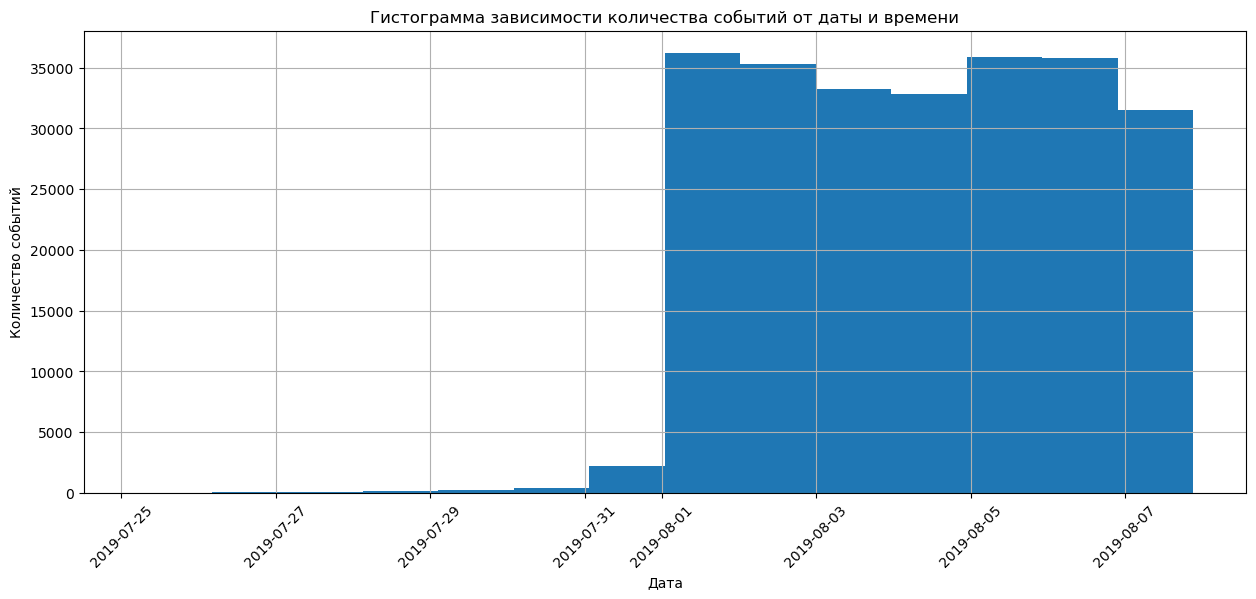

In [21]:
# строительство гистограммы зависимости количества событий от даты и времени
plt.figure(figsize=(15,6))
logs['event_time'].hist(bins=14)
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.title('Гистограмма зависимости количества событий от даты и времени')
plt.show()

На полученном графике хорошо видно, что в данных есть некоторая граница (01-08-2019), после которой объем данных резко меняется. Рассмотрим ближе период начиная с 1 августа. Увеличим количество корзин в пропорции количества дней и часов в сутках, чтобы увидеть в какой период наибольшая активность пользователей. Также для наглядности построим гистограмму только по дате. 

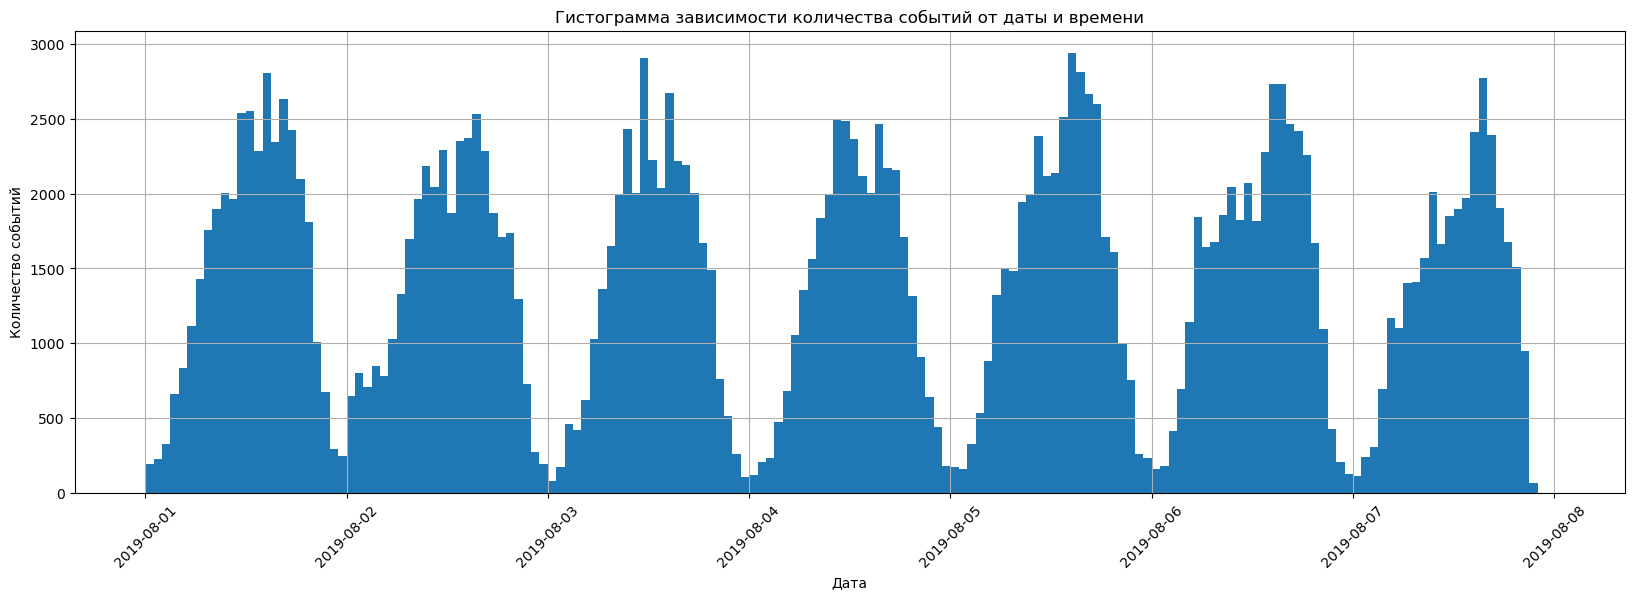

In [22]:
# строительство гистограммы зависимости количества событий от даты и времени
plt.figure(figsize=(20,6))
logs['event_time'].hist(bins=7*24, range=('2019-08-01','2019-08-08'))
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.title('Гистограмма зависимости количества событий от даты и времени')
plt.show()

Наибольшая активность пользователей в дневное время. Самые популярные часы в выходные дни в районе 12 часов, в будни - период с 15 до 16, чтобы получить заказ сразу по возвращению с работы домой.

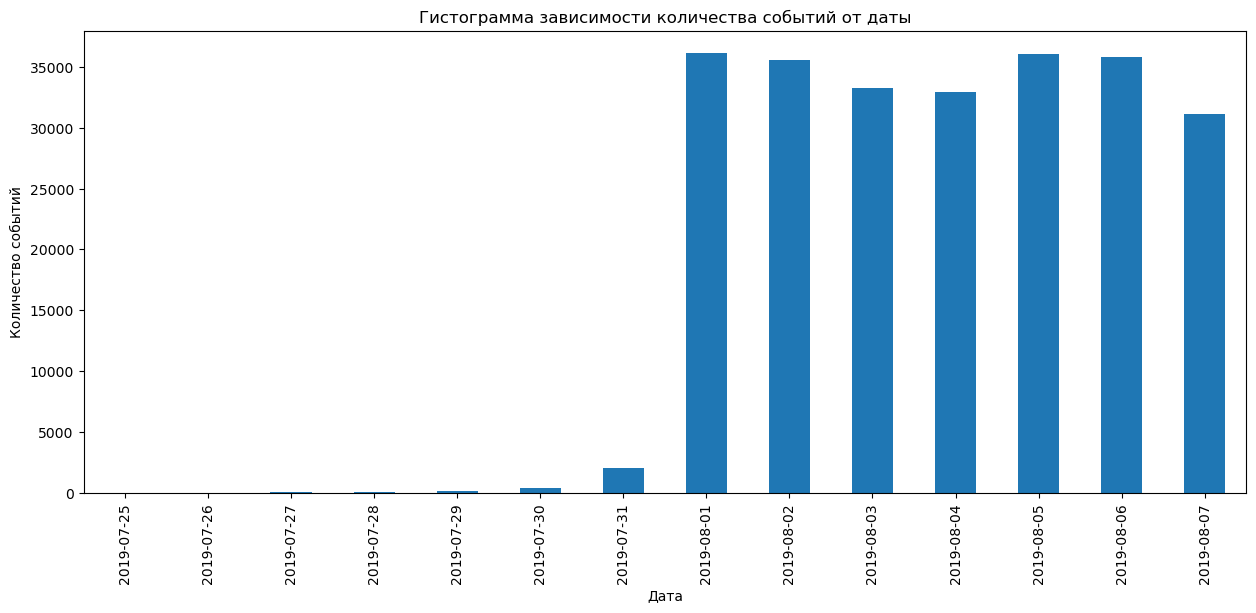

In [23]:
# строительство гистограммы зависимости количества событий от даты
logs.groupby('event_date')['event_name'].count().plot(kind='bar', figsize=(15,6))
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.title('Гистограмма зависимости количества событий от даты')
plt.show()

У явной границы (01-08-2019), после которой объем данных резко меняется, есть объяснение. Т.к. события обычно направляются в систему с клиентских устройств (с мобильных телефонов, например), то иногда, когда устройство не в сети, оно может накапливать события и слать позже при входе в сеть. При этом момент времени, когда событие случилось и когда оно принято сервером могут сильно различаться. Для любого события хранятся, как правило, два поля с датой-временем - время отправки и время приема. В нашем случае, скорее всего, данные выгрузили по времени приема, а не по времени отправки и в датасете оставили только одно время. Поэтому будем считать все события после этой границы - актуальные, до - устаревшие. В итоге получается, что на самом деле мы располагаем данными только с 01-08-2019 по 07-08-2019 (7 дней). 

In [24]:
# создание датафрейма logs_topical только с актуальными данными, который будет использоваться для дальнейшего исследования
logs_topical = logs[logs['event_time'] >= '2019-08-01']
# отображение таблицы logs_topical
display(logs_topical)

,event_name,user_id,event_time,exp_id,event_date
2826,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
2827,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2828,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2829,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2830,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01
...,...,...,...,...,...
243708,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
243709,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
243710,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
243711,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


Проверим сколько много событий и пользователей мы потеряли, отбросив старые данные.

In [25]:
# создание переменной logs_event_count_difference с разницей между общим и актуальным количеством событий 
logs_event_count_difference = logs_event_count - logs_topical['event_name'].count()
print(f'Устаревшее количество событий в логе: {logs_event_count_difference}')
print('Процент устаревших событий в логе: {}%'.format(logs_event_count_difference*100/logs_event_count))

Устаревшее количество событий в логе: 2826
Процент устаревших событий в логе: 1.1595606307418973%


In [26]:
# создание переменной logs_user_count_difference с разницей между общим и актуальным количеством пользователей
logs_user_count_difference = logs_user_count - logs_topical['user_id'].nunique()
print(f'Устаревшее количество пользователей в логе: {logs_user_count_difference}')
print('Процент устаревших пользователей в логе: {}%'.format(logs_user_count_difference*100/logs_user_count))

Устаревшее количество пользователей в логе: 17
Процент устаревших пользователей в логе: 0.22513574361011787%


По полученным расчетам хорошо видно, что процент устаревших событий и пользователей совсем незначительный около 1%.

Осталось проверить, что у нас есть пользователи из всех трёх экспериментальных групп. Для этого сгруппируем данные по их номеру и подсчитаем уникальное количество пользователей в каждой.

In [27]:
# подсчет количества уникальных пользователей в каждой группе
group = (
    logs_topical.groupby('exp_id', as_index=False) # группировка по номеру группы
    .agg({'user_id': 'nunique'})   # подсчет количества пользователей
    .rename(columns={'exp_id': '№_group', 'user_id': 'user_count'})  # переименование столбцов
)
# отображение таблицы
display(group)    

,№_group,user_count
0,246,2484
1,247,2513
2,248,2537


По данным из полученной таблицы видно, что уникальные пользователи есть во всех трех группах.

### Вывод

1. В логе 243713 событий.

2. В логе уникальных 7551 пользователя.

3. В среднем на одного пользователя приходится 32 события.

4. В логе данные за период с 2019-07-25 по 2019-08-07, из которых устаревшие данные до 2019-08-01.

5. Устаревшие события (2826) и пользователи (17) составляют около 1% от общего количества. Исключили их из дальнейшего анализа.

6. Наибольшая активность пользователей в дневное время. ЧНН в выходные дни в районе 12 часов, в будни - период с 15 до 16.

7. Убедились, что есть пользователи из всех трёх экспериментальных групп.

## Изучение воронки событий

Посмотрим, какие события есть в логах, как часто они встречаются. Для этого сделаем группировку по названию событий и посчитаем их количество и отсортируем по убыванию. Сохраним полученные данные в таблице `events_count`.

In [28]:
# вычисление количества повторений каждого события в логе
events_count = (
    logs_topical.groupby('event_name', as_index=False) # группировка наименований событий
    .agg({'user_id':'count'})          # подсчет количества повторений
    .rename(columns={'user_id':'event_count'})   # переименование столбца
    .sort_values(by='event_count', ascending=False)   # сортировка по убыванию
    .reset_index(drop=True) # обновление индексации с удалением старой
)
# отображение таблицы events_count
display(events_count)

,event_name,event_count
0,MainScreenAppear,117328
1,OffersScreenAppear,46333
2,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


Неудивительно, что самое распространенное событие - экран главной страницы, а инструкции, что-то совсем не пользуются спросом.

Теперь посчитаем, сколько пользователей совершали каждое из этих событий. Также сделаем группировку по названию событий и посчитаем уникальных пользователей для каждого. Отсортируем события по числу пользователей. Затем посчитаем долю пользователей, которые хоть раз совершали событие. Для этого рассчитаем отношение количества посетителей на определённом шаге к общему количеству посетителей. Все полученные данные сохраним в таблице `users_count`.

In [29]:
# вычисление количества уникальных пользователей каждого события в логе
users_count = (
    logs_topical.groupby('event_name', as_index=False) # группировка наименований событий
    .agg({'user_id':'nunique'})          # подсчет количества уникальных пользователей
    .rename(columns={'user_id':'users_count'})   # переименование столбца
    .sort_values(by='users_count', ascending=False) # сортировка по убыванию
    .reset_index(drop=True) # обновление индексации с удалением старой
)
# рассчет доли пользователей
users_count['conversion,%'] = round(users_count['users_count']
                                    /logs_topical['user_id'].nunique()*100,1)
# отображение таблицы users_count
display(users_count)

# строим график
fig = px.funnel(users_count, 
                x='conversion,%', 
                y='event_name', 
                title='Доля пользователей, дошедших до каждого этапа воронки'
                )
fig.show()

,event_name,users_count,"conversion,%"
0,MainScreenAppear,7419,98.5
1,OffersScreenAppear,4593,61.0
2,CartScreenAppear,3734,49.6
3,PaymentScreenSuccessful,3539,47.0
4,Tutorial,840,11.1


При рассмотрении событий можем предположить следующий их порядок:
1. главная страница (MainScreenAppear);
2. руководство по использованию (Tutorial);
3. страница с предложениями (OffersScreenAppear);
4. корзина (CartScreenAppear);
5. экран об успешном завершении платежа (PaymentScreenSuccessful).

В приложении стараются сделать процесс покупки как можно более простым и удобным для пользователя. Поэтому можно перейти к выбору и приобретению товара без ознакомления с руководством по использованию: например, есть кнопка «Пропустить». Поэтому данное событие явно не выстраивается в последовательную цепочку, не будем учитывать его при расчёте воронки.

In [30]:
# исключение из таблицы users_count событие Tutorial
users_count = users_count[users_count['event_name'] != "Tutorial"]
# отображение таблицы users_count
display(users_count)

# строим график
fig = px.funnel(users_count, 
                x='conversion,%', 
                y='event_name', 
                title='Доля пользователей, дошедших до каждого этапа воронки',
                )
fig.show()

,event_name,users_count,"conversion,%"
0,MainScreenAppear,7419,98.5
1,OffersScreenAppear,4593,61.0
2,CartScreenAppear,3734,49.6
3,PaymentScreenSuccessful,3539,47.0


Теперь по воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). 

In [31]:
# добавление столбца 'users_shift' со сдвигом в один шаг данных из столбца 'users_count'
users_count['users_shift'] = users_count['users_count'].shift(periods=1, fill_value=0)

# функция рассчет доли пользователей, которые проходят на следующий шаг воронки
def function(row):
    if row['users_shift'] == 0:
        return 100
    else:
        return round(row['users_count']/row['users_shift']*100, 1)
    
# создание нового столбца 'conversion_step,%' и запись в него значений, возвращаемых функцией    
users_count['conversion_step,%'] = users_count.apply(function, axis=1)

# удаление дополнительного столбца 'users_shift'
users_count = users_count.drop(columns = ['users_shift'], axis = 1)

# отображение таблицы users_count
display(users_count)

# строим график
fig = px.funnel(users_count, 
                x='conversion_step,%', 
                y='event_name', 
                title='Доля пользователей, дошедших до следующего этапа воронки',
                )
fig.show()

,event_name,users_count,"conversion,%","conversion_step,%"
0,MainScreenAppear,7419,98.5,100.0
1,OffersScreenAppear,4593,61.0,61.9
2,CartScreenAppear,3734,49.6,81.3
3,PaymentScreenSuccessful,3539,47.0,94.8


Отчетливо видно, что при переходе с главной страницы на страницу с предложениями происходит наибольшая потеря пользователей. Потери составляют 38% от общего числа. Возможно, в приложении у главной страницы непонятный интерфейс, что пользователь не может сообразить, как перейти к предложениями или в течение исследуемой недели были какие-то технические сложности при загрузке страницы с предложениями, т.к. на следующих шагах потери пользователей значительно меньше. После ознакомления с товаром только 19% пользователей ничего не выбирают, а 5% не оплачивают заказ после наполнения корзины.

Теперь узнаем какая доля пользователей доходит от первого события до оплаты.

In [32]:
# количество уникальных пользователей у первого и последнего событий
users_first = (
    users_count[['event_name', 'users_count']]
    .query('event_name in ["MainScreenAppear", "PaymentScreenSuccessful"]')
)
# рассчет доли пользователей
users_first['conv,%'] = round(users_first['users_count']/users_first.loc[0, 'users_count']*100, 1)
# отображение таблицы
display(users_first)

,event_name,users_count,"conv,%"
0,MainScreenAppear,7419,100.0
3,PaymentScreenSuccessful,3539,47.7


От первого события до оплаты доходит 48% пользователей, т.е. потери составляют 52%. Учитывая, что больше половины теряется при переходе с главной страницы, то при оперативном устранении причин, вызывающих потери на этом этапе, можно значительно увеличить объемы продаж.

### Вывод

1. Чтобы добраться до покупки пользователь проходит через следующие этапы:
* главная страница (MainScreenAppear);
* руководство по использованию (Tutorial) - есть возможность пропуска данного этапа;
* страница с предложениями (OffersScreenAppear);
* корзина (CartScreenAppear);
* экран об успешном завершении платежа (PaymentScreenSuccessful).

2. С момента загрузки приложения и перехода на главную страницу теряется 1,5% пользователей. Наибольшие потери пользователей при переходе с главной страницы на страницу с предложениями - 38%. После ознакомления с товаром только 19% пользователей ничего не выбирают, а 5% не оплачивают заказ после наполнения корзины.


3. С главной страницы до оплаты доходит 48% пользователей.

## Изучение результатов A/A/B-эксперимента

Ещё раз посмотрим на количество пользователей в каждой экспериментальной группе.

In [33]:
# количествo уникальных пользователей в каждой группе
group = logs_topical.groupby('exp_id')['user_id'].nunique()
display(group) 

exp_id
246    2484
247    2513
248    2537
Name: user_id, dtype: int64

Посморим сразу на суммарные значения контрольных групп 246 и 247.

In [34]:
# количествo уникальных пользователей в 246 и 247 группах одновременно
group['246_247'] = group[246] + group[247]
display(group)

exp_id
246        2484
247        2513
248        2537
246_247    4997
Name: user_id, dtype: int64

Для наглядности и удобства сформируем общую таблицу с уникальным количеством пользователей и конверсией для каждой группы в разрезе событий.

In [35]:
# вычисление количества уникальных пользователей группы для каждого события в логе
group_test = (
    logs_topical[logs_topical['event_name'] != "Tutorial"].pivot_table(index='event_name',
                                                                      columns='exp_id',
                                                                      values='user_id',
                                                                      aggfunc='nunique')
    .sort_values(by=246, ascending=False) # сортировка по убыванию
    .reset_index(drop=False) # обновление индексации
)

# переименование столбцов
group_test.columns = ['event_name', '246', '247', '248'] 

# добавление суммы контрольных групп
group_test['246_247'] = group_test[['246', '247']].sum(axis = 1)

# рассчет конверсии
group_test['conv_246,%'] = round(group_test['246'] / group[246]*100, 1)
group_test['conv_247,%'] = round(group_test['247'] / group[247]*100, 1)
group_test['conv_248,%'] = round(group_test['248'] / group[248]*100, 1)
group_test['conv_246_247,%'] = round(group_test['246_247'] / group['246_247']*100, 1)
display(group_test)

,event_name,246,247,248,246_247,"conv_246,%","conv_247,%","conv_248,%","conv_246_247,%"
0,MainScreenAppear,2450,2476,2493,4926,98.6,98.5,98.3,98.6
1,OffersScreenAppear,1542,1520,1531,3062,62.1,60.5,60.3,61.3
2,CartScreenAppear,1266,1238,1230,2504,51.0,49.3,48.5,50.1
3,PaymentScreenSuccessful,1200,1158,1181,2358,48.3,46.1,46.6,47.2


Теперь проверим статистическую значимость различий в конверсии между группами.

* Нулевая гипотеза: различий в долях между группами нет.
* Альтернативная гипотеза: различия в долях между группами есть.

Для этого напишем функцию `function`. Считаем статистику в стандартных отклонениях стандартного нормального распределения. Если пропорции будут равны, разница между ними будет равна нулю. Посчитаем, как далеко статистика уехала от нуля. Так как распределение статистики нормальное, вызовем метод `cdf()`. Саму статистику возьмём по модулю методом `abs()` — чтобы получить правильный результат независимо от её знака. Это возможно, потому что тест двусторонний. По этой же причине удваиваем результат.

In [36]:
alpha = .003125 # критический уровень статистической значимости

# функция проверки гипотез
def function(a1, b1, a2, b2):
    successes = np.array([a1, a2])
    trials = np.array([b1, b2])
    
    p1 = successes[0]/trials[0] # пропорция успехов в первой группе
    p2 = successes[1]/trials[1] # пропорция успехов во второй группе
    
    # пропорция успехов в комбинированном датасете
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])  
                      
    # разница пропорций в датасетах
    difference = p1 - p2                   

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(
        p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1])
        )

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        )

Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверим, находят ли статистические критерии разницу между выборками 246 и 247.

In [37]:
for i in range(len(group_test)):
    function(group_test.loc[i,'246'], group[246], group_test.loc[i,'247'], group[247])
    print('Число пользователей - {0} и доля пользователей - {1}, совершивших событие {2} в {3} группе.'
          .format(group_test.loc[i,'246'],
                  group_test.loc[i,'conv_246,%'],
                  group_test.loc[i,'event_name'],
                  246
                 )
         )
    print('Число пользователей - {0} и доля пользователей - {1}, совершивших событие {2} в {3} группе.'
          .format(group_test.loc[i,'247'],
                  group_test.loc[i,'conv_247,%'],
                  group_test.loc[i,'event_name'],
                  247
                 )
         )
    print()

p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Число пользователей - 2450 и доля пользователей - 98.6, совершивших событие MainScreenAppear в 246 группе.
Число пользователей - 2476 и доля пользователей - 98.5, совершивших событие MainScreenAppear в 247 группе.

p-значение:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Число пользователей - 1542 и доля пользователей - 62.1, совершивших событие OffersScreenAppear в 246 группе.
Число пользователей - 1520 и доля пользователей - 60.5, совершивших событие OffersScreenAppear в 247 группе.

p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Число пользователей - 1266 и доля пользователей - 51.0, совершивших событие CartScreenAppear в 246 группе.
Число пользователей - 1238 и доля пользователей - 49.3, совершивших событие CartScreenAppear в 247 группе.

p-значение:  0.11456

Такая разница в пропорциях при указанных размерах выборок для всех этапов воронки достаточна, чтобы говорить об отсутствии статистически значимом различии. Если бы мы утверждали, что доли групп 246 и 247 различаются, мы бы допустили ошибку:
* для события MainScreenAppear с вероятностью 76%;
* для события OffersScreenAppear с вероятностью 25%;
* для события CartScreenAppear с вероятностью 23%;
* для события PaymentScreenSuccessful с вероятностью 11%.

Две контрольные группы оказались равны, мы можете быть уверены в точности проведенного тестирования. 

Аналогичную проверку проведем для контрольной группы 246 и экспериментальной 248.

In [38]:
for i in range(len(group_test)):
    function(group_test.loc[i,'246'], group[246], group_test.loc[i,'248'], group[248])
    print('Число пользователей - {0} и доля пользователей - {1}, совершивших событие {2} в {3} группе.'
          .format(group_test.loc[i,'246'],
                  group_test.loc[i,'conv_246,%'],
                  group_test.loc[i,'event_name'],
                  246
                 )
         )
    print('Число пользователей - {0} и доля пользователей - {1}, совершивших событие {2} в {3} группе.'
          .format(group_test.loc[i,'248'],
                  group_test.loc[i,'conv_248,%'],
                  group_test.loc[i,'event_name'],
                  248
                 )
         )
    print()

p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Число пользователей - 2450 и доля пользователей - 98.6, совершивших событие MainScreenAppear в 246 группе.
Число пользователей - 2493 и доля пользователей - 98.3, совершивших событие MainScreenAppear в 248 группе.

p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Число пользователей - 1542 и доля пользователей - 62.1, совершивших событие OffersScreenAppear в 246 группе.
Число пользователей - 1531 и доля пользователей - 60.3, совершивших событие OffersScreenAppear в 248 группе.

p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Число пользователей - 1266 и доля пользователей - 51.0, совершивших событие CartScreenAppear в 246 группе.
Число пользователей - 1230 и доля пользователей - 48.5, совершивших событие CartScreenAppear в 248 группе.

p-значение:  0.2122

Такая разница в пропорциях при указанных размерах выборок для всех этапов воронки достаточна, чтобы говорить об отсутствии статистически значимом различии. Если бы мы утверждали, что доли групп 246 и 248 различаются, мы бы допустили ошибку:
* для события MainScreenAppear с вероятностью 29%;
* для события OffersScreenAppear с вероятностью 21%;
* для события CartScreenAppear с вероятностью 8%;
* для события PaymentScreenSuccessful с вероятностью 21%.

Теперь посмотрим есть ли разница в выборках для контрольной группы 247 и экспериментальной 248.

In [39]:
for i in range(len(group_test)):
    function(group_test.loc[i,'247'], group[247], group_test.loc[i,'248'], group[248])
    print('Число пользователей - {0} и доля пользователей - {1}, совершивших событие {2} в {3} группе.'
          .format(group_test.loc[i,'247'],
                  group_test.loc[i,'conv_247,%'],
                  group_test.loc[i,'event_name'],
                  247
                 )
         )
    print('Число пользователей - {0} и доля пользователей - {1}, совершивших событие {2} в {3} группе.'
          .format(group_test.loc[i,'248'],
                  group_test.loc[i,'conv_248,%'],
                  group_test.loc[i,'event_name'],
                  248
                 )
         )
    print()

p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Число пользователей - 2476 и доля пользователей - 98.5, совершивших событие MainScreenAppear в 247 группе.
Число пользователей - 2493 и доля пользователей - 98.3, совершивших событие MainScreenAppear в 248 группе.

p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Число пользователей - 1520 и доля пользователей - 60.5, совершивших событие OffersScreenAppear в 247 группе.
Число пользователей - 1531 и доля пользователей - 60.3, совершивших событие OffersScreenAppear в 248 группе.

p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Число пользователей - 1238 и доля пользователей - 49.3, совершивших событие CartScreenAppear в 247 группе.
Число пользователей - 1230 и доля пользователей - 48.5, совершивших событие CartScreenAppear в 248 группе.

p-значение:  0.737341

Такая разница в пропорциях при указанных размерах выборок для всех этапов воронки достаточна, чтобы говорить об отсутствии статистически значимом различии. Если бы мы утверждали, что доли групп 247 и 248 различаются, мы бы допустили ошибку:
* для события MainScreenAppear с вероятностью 46%;
* для события OffersScreenAppear с вероятностью 92%;
* для события CartScreenAppear с вероятностью 58%;
* для события PaymentScreenSuccessful с вероятностью 74%.

Сделаем последнюю проверку для комбинированной контрольной группы 246-247 и экспериментальной 248.

In [40]:
for i in range(len(group_test)):
    function(group_test.loc[i,'246_247'], group['246_247'], group_test.loc[i,'248'], group[248])
    print('Число пользователей - {0} и доля пользователей - {1}, совершивших событие {2} в {3} группе.'
          .format(group_test.loc[i,'246_247'],
                  group_test.loc[i,'conv_246_247,%'],
                  group_test.loc[i,'event_name'],
                  '246 и 247'
                 )
         )
    print('Число пользователей - {0} и доля пользователей - {1}, совершивших событие {2} в {3} группе.'
          .format(group_test.loc[i,'248'],
                  group_test.loc[i,'conv_248,%'],
                  group_test.loc[i,'event_name'],
                  248
                 )
         )
    print()

p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Число пользователей - 4926 и доля пользователей - 98.6, совершивших событие MainScreenAppear в 246 и 247 группе.
Число пользователей - 2493 и доля пользователей - 98.3, совершивших событие MainScreenAppear в 248 группе.

p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Число пользователей - 3062 и доля пользователей - 61.3, совершивших событие OffersScreenAppear в 246 и 247 группе.
Число пользователей - 1531 и доля пользователей - 60.3, совершивших событие OffersScreenAppear в 248 группе.

p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Число пользователей - 2504 и доля пользователей - 50.1, совершивших событие CartScreenAppear в 246 и 247 группе.
Число пользователей - 1230 и доля пользователей - 48.5, совершивших событие CartScreenAppear в 248 группе.



Такая разница в пропорциях при указанных размерах выборок для всех этапов воронки достаточна, чтобы говорить об отсутствии статистически значимом различии. Если бы мы утверждали, что доли групп 246-247 и 248 различаются, мы бы допустили ошибку:
* для события MainScreenAppear с вероятностью 29%;
* для события OffersScreenAppear с вероятностью 43%;
* для события CartScreenAppear с вероятностью 18%;
* для события PaymentScreenSuccessful с вероятностью 60%.

При проверке статистических гипотез используем уровень значимости равный 0.05, т.е. вероятность получить одно значимое различие равняется 5%, но это справедливо только не для множественного сравнения выборок. Если провести расчёты, то мы провели 16 сравнительных тестов: 4 выборки по 4 гипотезы в каждой для каждого события. Если применять метод Бонферрони, то чтобы сохранить одно значимое различие в 5% случаях необходимо уровень значимости разделить на количество гипотез `bonferroni_alpha = alpha / 16`. Проанализировав данные полученные z-тестом мы можем с уверенностью сказать, что изменение уровня значимости на 0.003125 не отразился на конечных результатах.

### Вывод

Проведено 16 сравнительных тестов: 4 выборки по 4 гипотезы в каждой для каждого события. Которые подтвердили, что статистически значимых различий в долях между контрольными и экспериментальными группами нет.

## Общий вывод

Во время исследования данных было установлено:
1. В логе 7551 уникальных пользователя.

2. В среднем на одного пользователя приходится 32 события.

3. Данные за период с 2019-07-25 по 2019-08-07, из которых устаревшие данные до 2019-08-01. Поэтому далее в исследовании использовали период с 2019-08-01 по 2019-08-07.


Благодаря изучению воронки продаж получены следующие результаты:
1. Чтобы добраться до покупки пользователь проходит через следующие этапы:
* главная страница (MainScreenAppear);
* руководство по использованию (Tutorial) - есть возможность пропуска данного этапа;
* страница с предложениями (OffersScreenAppear);
* корзина (CartScreenAppear);
* экран об успешном завершении платежа (PaymentScreenSuccessful).

2. С главной страницы до оплаты доходит 48% пользователей.


3. С момента загрузки приложения и перехода на главную страницу теряется 1,5% пользователей. Наибольшие потери пользователей при переходе с главной страницы на страницу с предложениями - 38%. После ознакомления с товаром только 19% пользователей ничего не выбирают, а 5% не оплачивают заказ после наполнения корзины.

Возможно, в приложении у главной страницы непонятный интерфейс, что пользователь не может сообразить, как перейти к предложениями или в течение исследуемой недели были какие-то технические сложности при загрузке страницы с предложениями. Необходима уточнить данный момент, т.к. устранение данной проблемы значительно увеличит процент продаж.

Согласно исследованию результатов A/A/B-эксперимента были сделаны выводы, что изменение шрифта на поведение пользователей не влияет.